In [6]:
import numpy as np, urllib.request as req
from numpy.linalg import svd
import matplotlib.pyplot as plt
from matplotlib.mlab import PCA   # в следующих версиях будет удалено, лучше пользоваться другими библиотеками
plt.rcParams.update({'font.size': 20})

url = "http://sprotasov.ru/files/food.txt"

raw = req.urlopen(url).read().decode('utf-8')

with open("data/food.txt", "w") as f:
    f.write(raw)
with open("data/food.txt", "r") as f:
    raw = f.read()

lines = raw.replace('\n\n', '\n').split('\n')
table = [s.strip().split('\t') for s in lines]

In [7]:
# заголовки измерений
headers = table[0][2:]
# названия продуктов
products = [row[0] for row in table[1:]]
# категории
cats = [row[1] for row in table[1:]]
catset = set(cats)
# собственно данные
data = [list(map(float, row[2:])) for row in table[1:]]

In [8]:
M = np.matrix(data)
mean = M.mean(0)     # нашли средние значения по каждому измерению

C:\Users\xenos\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: The PCA class was deprecated in version 2.2.
  


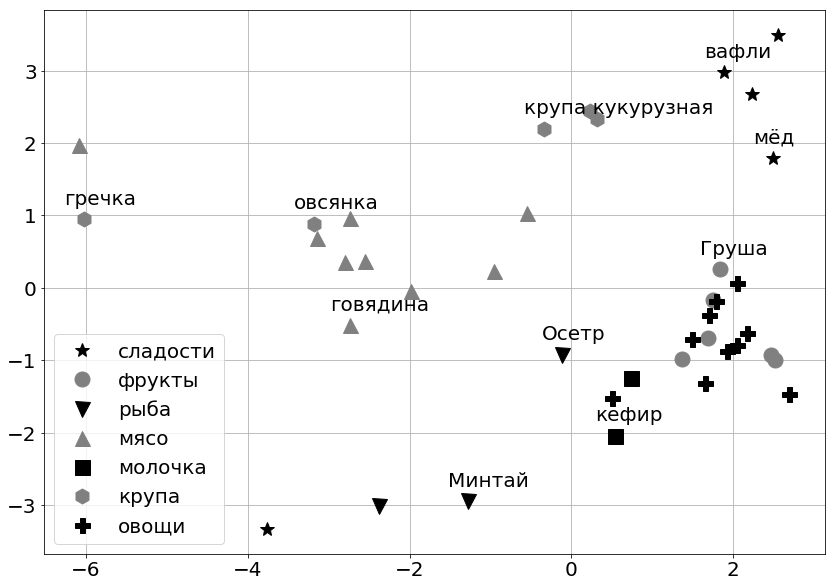

In [9]:
N = 2 # снижаем размерность до 2, чтобы нарисовать
d = PCA(M).Y[:,:N]
x = d.T.A[0]
y = d.T.A[1]
colors = ['black', 'gray', 'black', 'gray', 'black', 'gray', 'black']
markers = ['*', 'o', 'v', '^', 's', 'h', 'P', 'x']
interesting = {'крупа кукурузная', 'гречка', 'овсянка', 'Осетр', 'вафли', 'мёд', 'кефир','говядина', 'Груша', 'Минтай'}
cd = dict(zip(list(catset), colors))
md = dict(zip(list(catset), markers))

plt.figure(figsize=(14,10))
for cat in catset:
    xa = [p[0] for p in zip(x, cats) if p[1] == cat]
    ya = [p[0] for p in zip(y, cats) if p[1] == cat]
    id = [p[0] for p in zip(range(len(x)), cats) if p[1] == cat]
    for i in id:
        if products[i] in interesting:
            plt.annotate(products[i], xy=(x[i], y[i]), xytext=(-20, 15), textcoords='offset points')
    plt.plot(xa, ya, md[cat], markersize=15,color=cd[cat],label=cat)
plt.legend()
plt.grid(True)
plt.show()